In [1]:
from IPython.display import HTML, SVG
from rdkit import Chem
from rdkit.Chem import PandasTools 
PandasTools.RenderImagesInAllDataFrames(images=True)  
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None) 
display(HTML("<style>.container { width:100% !important; }</style>"))  
import math

In [2]:
df = pd.read_pickle('/scratch/xg590/scratch/PDBcov/FlaskPy/df_web.pkl') 
df = df[df['InChIKey'].notna()]
print(df['binder_id'].nunique(), len(df))
#df.head(1)

2204 7374


In [3]:
df_warhead_lib = pd.DataFrame(columns=[ 'Warhead Name' , 'Warhead SMARTS' , 'Reaction Pattern' , 'Residue Target' ])
for idx, x in df.drop_duplicates(['warhead_name']).sort_values(['warhead_name']).iterrows(): 
    df_warhead_lib= df_warhead_lib.append({'Warhead Name':x.warhead_name , 
                           'Warhead SMARTS':x.warhead_smarts , 
                           'Reaction Pattern':'' , 
                           'Residue Target':', '.join(df[df['warhead_name']==x.warhead_name]['res_name'].unique()) },
                         ignore_index=True) 
df_warhead_lib

,Warhead Name,Warhead SMARTS,Reaction Pattern,Residue Target
0,Acrylamide,"[#7][#6](=O)[#6]=,#,:[#6]",,"CYS, THR, LYS, HIS"
1,Aldehyde,[CD2]=O,,"CYS, SER, LYS, THR, HIS"
2,Aldehyde_Adduct,"OC[S,P](~O)(~O)~O",,CYS
3,Alkene,C=C,,LYS
4,Alkyne,C#C,,"HIS, TYR, CYS, LYS"
5,Amide,[#7]C(=O)[#6],,SER
6,Aminophosphonic_Halide,"O=P(O)([F,Cl,Br,I])N",,SER
7,Aryl_Halide,"c[F,Cl,Br,I]",,"LYS, CYS"
8,Azide,[N-]=[N+]=N,,LYS
9,Aziridine,C1NC1,,"GLU, ASP, CYS"


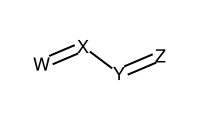

In [4]:

from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D, MolDraw2D

from rdkit import Chem, RDConfig
from rdkit.Chem import AllChem, PandasTools, Draw, rdDepictor
import io, os, re, time, math, urllib, Bio.PDB, sys, pandas as pd
op = rdMolDraw2D.MolDrawOptions() # https://rdkit.org/docs/source/rdkit.Chem.Draw.rdMolDraw2D.html?#rdkit.Chem.Draw.rdMolDraw2D.MolDrawOptions
op.bondLineWidth=2
op.maxFontSize=18
op.minFontSize=18
#op.legendFontSize=18
op.fillHighlights=False
op.fixedBondLength=30
op.centreMoleculesBeforeDrawing=True
op.atomHighlightsAreCircles = True  
op.fontFile = os.path.join(RDConfig.RDCodeDir, 'Chem', 'Draw', 'FreeSans.ttf') # Amadeus.ttf | Telex-Regular.ttf


s = 'C=CC=C'
m = Chem.MolFromSmiles(s)
m = rdMolDraw2D.PrepareMolForDrawing(m)
drawer = rdMolDraw2D.MolDraw2DSVG(200, 120)
drawer.SetDrawOptions(op) 
drawer.drawOptions().atomLabels[0]='W'
drawer.drawOptions().atomLabels[1]='X'
drawer.drawOptions().atomLabels[2]='Y'
drawer.drawOptions().atomLabels[3]='Z'
# drawer.drawOptions().atomLabels[1]=atom
drawer.DrawMolecule(m)
drawer.FinishDrawing() 

display(SVG(drawer.GetDrawingText().replace('xmlns=','this_is_garbage=') ))